In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
hatches = ['+', 'x', 'o', '.', '*',"/"]
sns.set(font_scale=0.75)

def plot(filename,title,ylim,ylabel):
    df=pd.read_csv(filename)
    df = df.sort_values(['group', 'name'],ascending = [True, True])
    # print(df.to_latex(index=False))
    sns.set(rc={'figure.figsize':(6,2)})
    plt.ylim(0,ylim)
    ax=sns.barplot(df, x="group",y="result",hue="name",orient="v", width=0.8,palette="pastel")
    ax.set(xlabel ="", ylabel = ylabel, title =title)
    for container in ax.containers:
        labels=ax.bar_label(container, fmt='%.0f', rotation="vertical",padding=3)
        for label in labels:
            label.set_fontsize(8)
            label.set_color("gray")
    sns.move_legend(
        ax, "lower center",
        bbox_to_anchor=(0.5, -.55),
        ncol=3,
        title=None, frameon=False,
    )
    for i, container in enumerate(ax.containers):
        for patch in container.patches:
            patch.set_hatch(hatches[i % len(hatches)])
    plt.show()

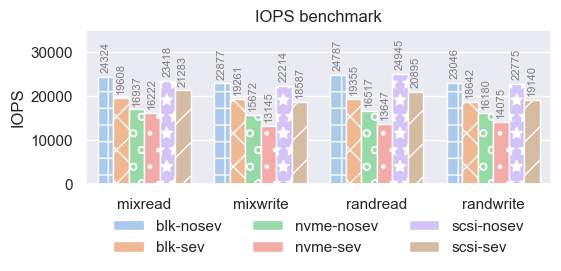

In [2]:
plot("benchmarks/iops_results.csv", title="IOPS benchmark", ylim=35000, ylabel="IOPS")

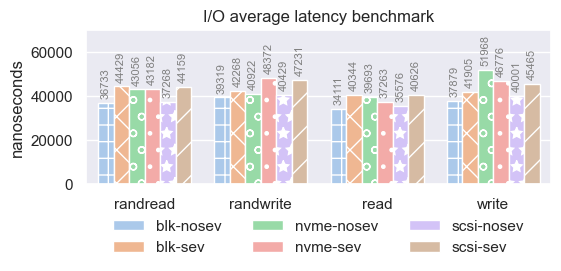

In [3]:
plot("benchmarks/al_results.csv",'I/O average latency benchmark',ylim=70000,ylabel="nanoseconds")

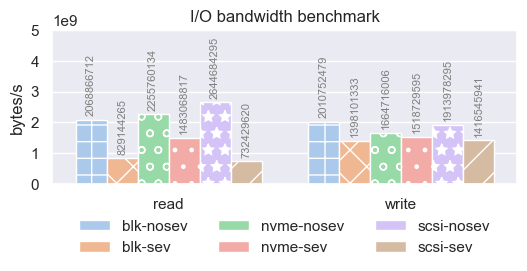

In [4]:
plot("benchmarks/bw_results.csv",'I/O bandwidth benchmark',ylim=5000000000,ylabel="bytes/s")